#### CO2 Emissions by sector - Time series forecasting

We present the estimates of daily, sector-specific, country-level (China) CO2 emissions from January 1st, 2019 to June 30th, 2020, constructed primarily from near-real-time activity data, results of the international research initiative Carbon Monitor (https://carbonmonitor.org/). These estimates provide a picture of the daily, weekly, and seasonal dynamics of CO2 emissions before and after the COVID-19 pandemic and the economic downturn that it has triggered.

Daily CO2 emissions by sectors in 2019 and January 1st through July 1st 2020 for 
a) Power sector, 
b) Ground transportation sector, 
b) Industry sector,
d) Residential sector, and 
e) Aviation (domestic) sector 

We begin by analyzing the column features

Analyzing data from the source datasets We import the required modules

In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 16

import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages


In [22]:
df_sector = pd.read_excel(r'C:\Users\a687u420\OneDrive - The University of Kansas\KU courses\Fall 2020\Project\Data\Carbon monitor\carbon-monitor-China.xlsx')
df_sector.head(10)

,date,sector,MtCO2
0,01/01/2019,Power,14.700140
1,02/01/2019,Power,15.975473
2,03/01/2019,Power,15.865331
3,04/01/2019,Power,15.575482
4,05/01/2019,Power,15.705914
5,06/01/2019,Power,15.176458
6,07/01/2019,Power,15.618960
7,08/01/2019,Power,15.278871
8,09/01/2019,Power,15.652775
9,10/01/2019,Power,15.622824


In [23]:
df_sector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740 entries, 0 to 2739
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2735 non-null   object 
 1   sector  2735 non-null   object 
 2   MtCO2   2735 non-null   float64
dtypes: float64(1), object(2)
memory usage: 64.3+ KB


In [24]:
df_sector.index=pd.to_datetime(df_sector.date,format='%d/%m/%Y')
df_sector = df_sector.set_index('date')
df_sector.index
df_sector.head(10)

,sector,MtCO2
date,,
01/01/2019,Power,14.700140
02/01/2019,Power,15.975473
03/01/2019,Power,15.865331
04/01/2019,Power,15.575482
05/01/2019,Power,15.705914
06/01/2019,Power,15.176458
07/01/2019,Power,15.618960
08/01/2019,Power,15.278871
09/01/2019,Power,15.652775


In [25]:
ts = df_sector[pd.Series(pd.to_datetime(df_sector.index, errors='coerce')).notnull().values]
ts.head(15)

,sector,MtCO2
date,,
01/01/2019,Power,14.700140
02/01/2019,Power,15.975473
03/01/2019,Power,15.865331
04/01/2019,Power,15.575482
05/01/2019,Power,15.705914
06/01/2019,Power,15.176458
07/01/2019,Power,15.618960
08/01/2019,Power,15.278871
09/01/2019,Power,15.652775


In [26]:
ts.dtypes

sector     object
MtCO2     float64
dtype: object

In [27]:
#ss = ts.copy(deep=True)
ts['MtCO2'] = pd.to_numeric(ts['MtCO2'] , errors='coerce')
ts.head(20)

,sector,MtCO2
date,,
01/01/2019,Power,14.700140
02/01/2019,Power,15.975473
03/01/2019,Power,15.865331
04/01/2019,Power,15.575482
05/01/2019,Power,15.705914
06/01/2019,Power,15.176458
07/01/2019,Power,15.618960
08/01/2019,Power,15.278871
09/01/2019,Power,15.652775


In [28]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2735 entries, 01/01/2019 to 30/09/2020
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sector  2735 non-null   object 
 1   MtCO2   2735 non-null   float64
dtypes: float64(1), object(1)
memory usage: 64.1+ KB


In [29]:
ts.dropna(inplace = True)

In [30]:
Energy_sources = ts.groupby('sector')
Energy_sources.head()

,sector,MtCO2
date,,
01/01/2019,Power,14.700140
02/01/2019,Power,15.975473
03/01/2019,Power,15.865331
04/01/2019,Power,15.575482
05/01/2019,Power,15.705914
01/01/2019,Ground Transport,2.499378
02/01/2019,Ground Transport,2.517389
03/01/2019,Ground Transport,2.507306
04/01/2019,Ground Transport,2.551211


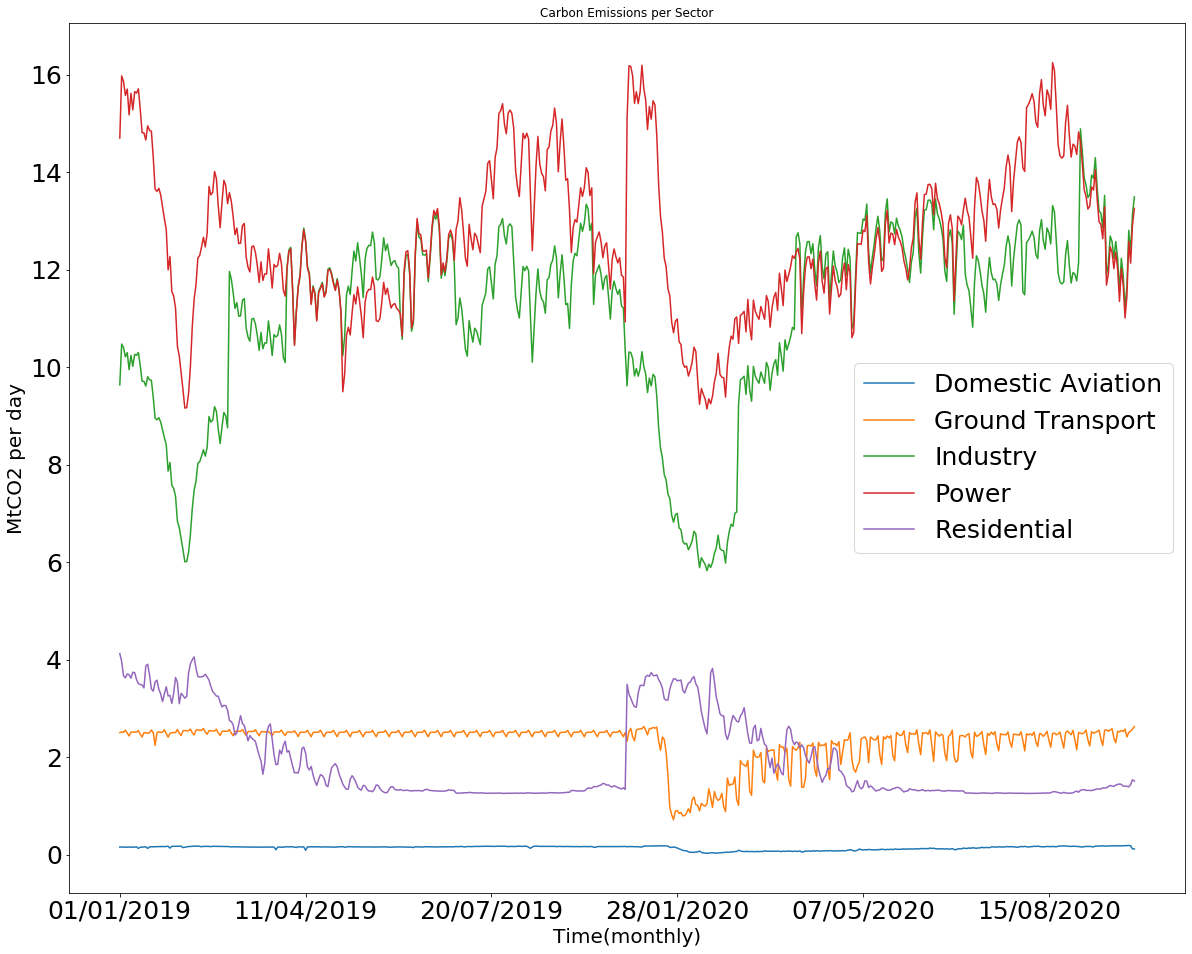

In [31]:
#Global CO2 emission by sector
fig, ax = plt.subplots()
for desc, group in Energy_sources:
    group.plot(y='MtCO2', label=desc,ax = ax, title='Carbon Emissions per Sector', fontsize = 25)
    ax.set_xlabel('Time(monthly)')
    ax.set_ylabel('MtCO2 per day')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.legend(fontsize = 25)

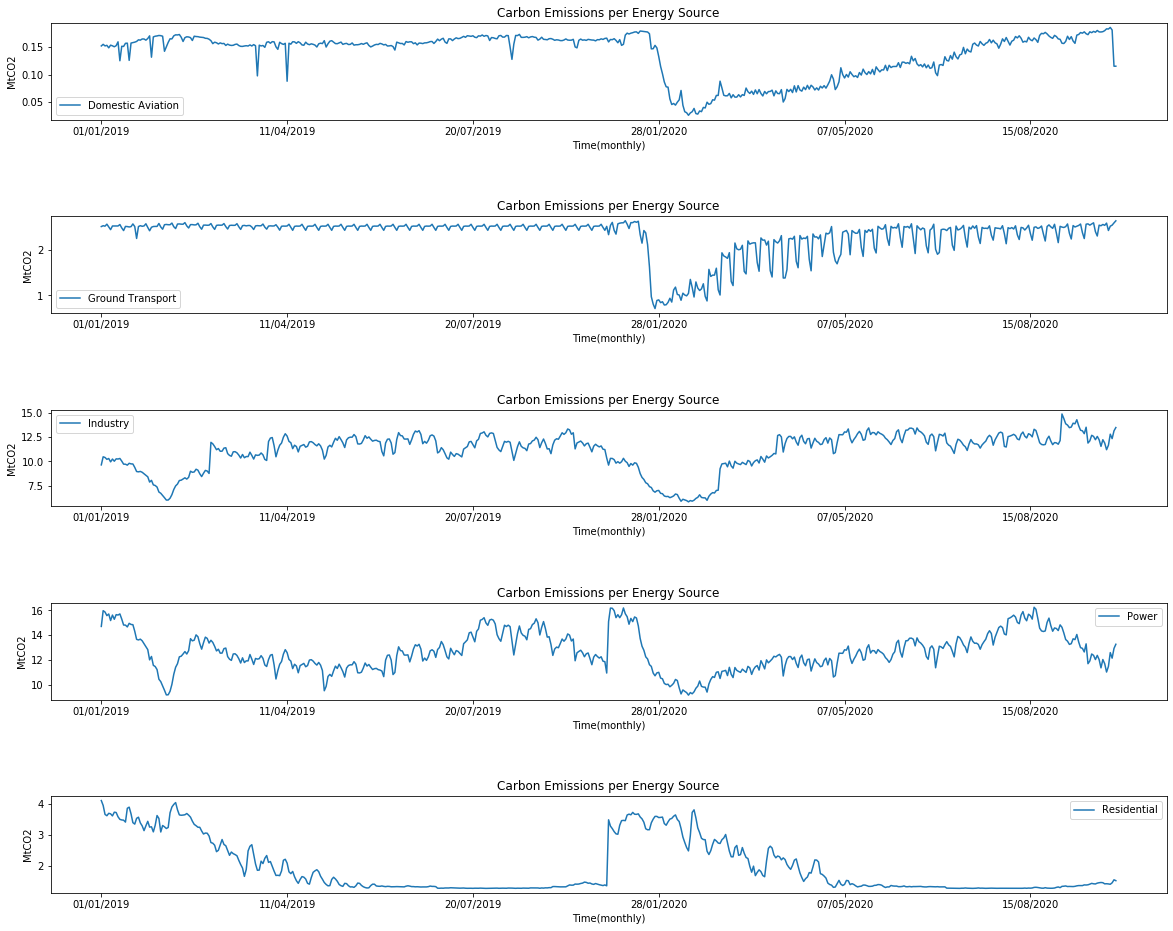

In [32]:
#Plotting sectorwise for better interpretation

fig, axes = plt.subplots(5,1)
plt.subplots_adjust(hspace=1)
for (desc, group), ax in zip(Energy_sources, axes):
    group.plot(y='MtCO2', ax=ax, label=desc, title='Carbon Emissions per Energy Source')
    ax.set_xlabel('Time(monthly)')
    ax.set_ylabel('MtCO2')
plt.show()

Daily CO2 emissions rebounded in most countries since April or May, with China’s emissions in May of 2020 exceeding its emissions in May of 2019 by 5.4%.  As observed, the ground transport, Insutry , power decreased at the begiining of 2020 and then slowly relaxed around March 2020 when the other countries had greater COVID effect.